# Task a) and b) of Project 1 - FYS-STK4155

In [67]:
from functions import *

%load_ext autoreload
%autoreload 2

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 10,
})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# a) Ordinary Least Squares (OLS)
* Using OLS to predict the Runge function.
* Method is applied for the different number of data points in `n_vals` and for the different polynomial degrees in `p_vals`.
* Model performance assessed with MSE score and R^2 score.

In [68]:
n = 2000  # samples
p_vals = np.arange(2, 16)  # polynomial degrees

In [69]:
df_OLS_degs = OLS_various_poly_deg(n, p_vals)  # Dataframe with results for n samples and range of poly degrees

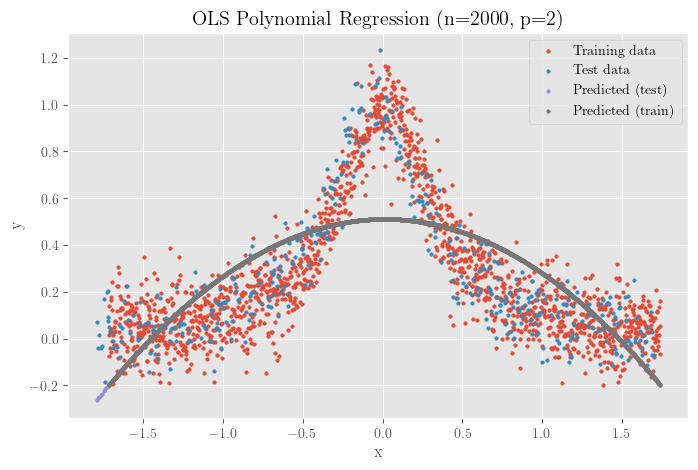

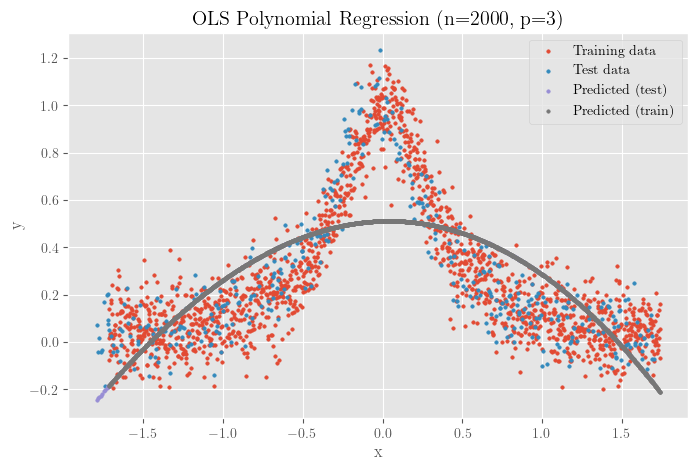

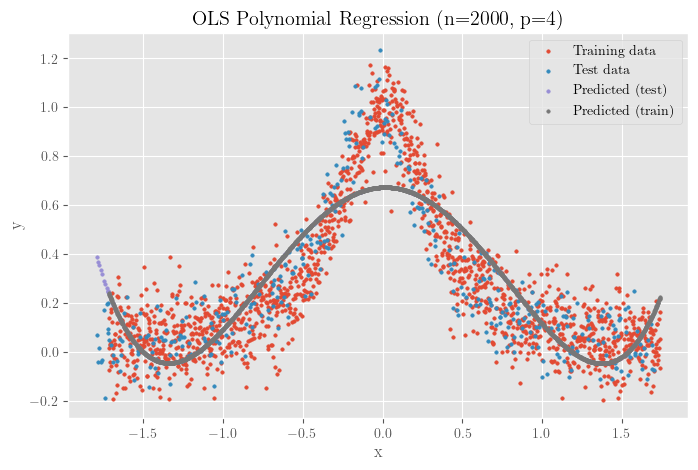

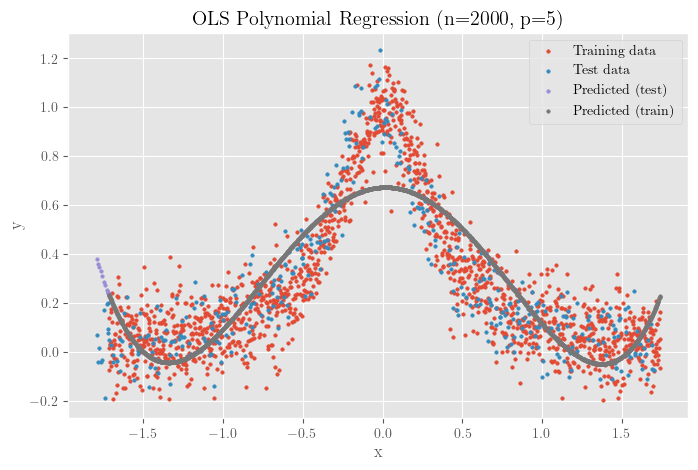

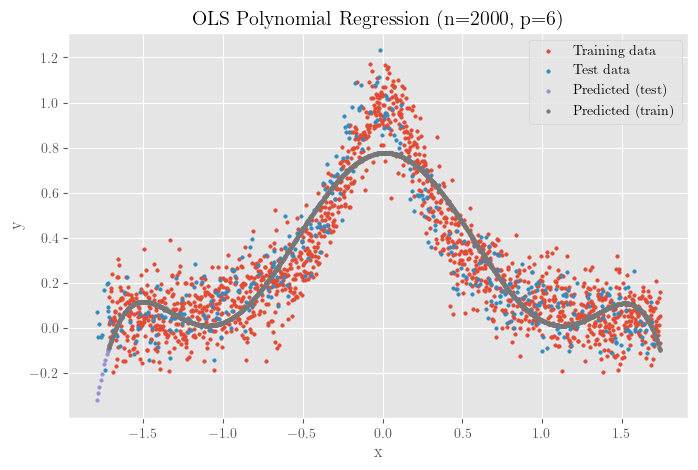

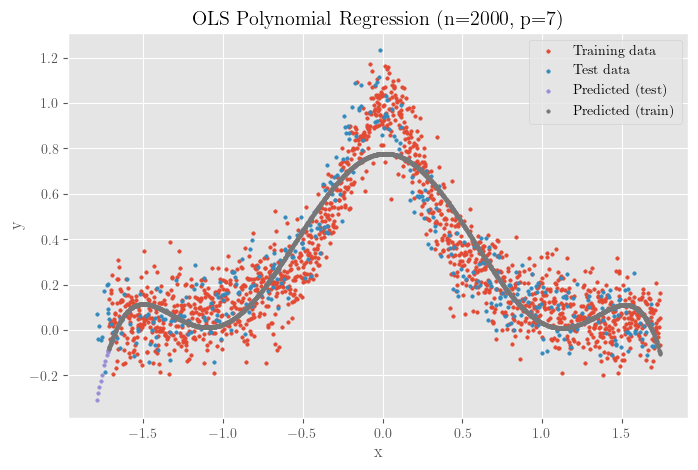

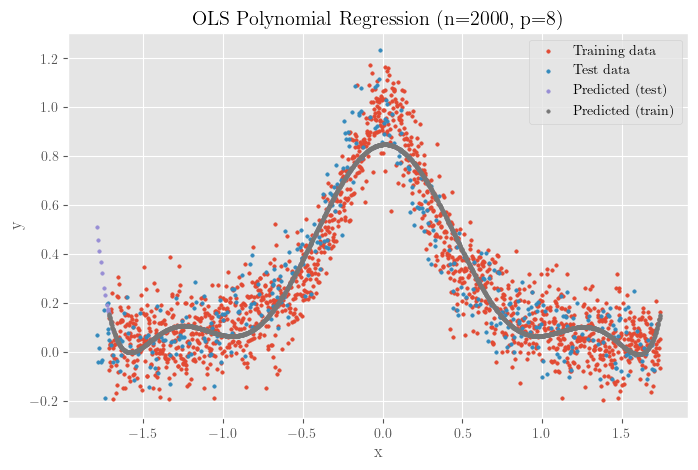

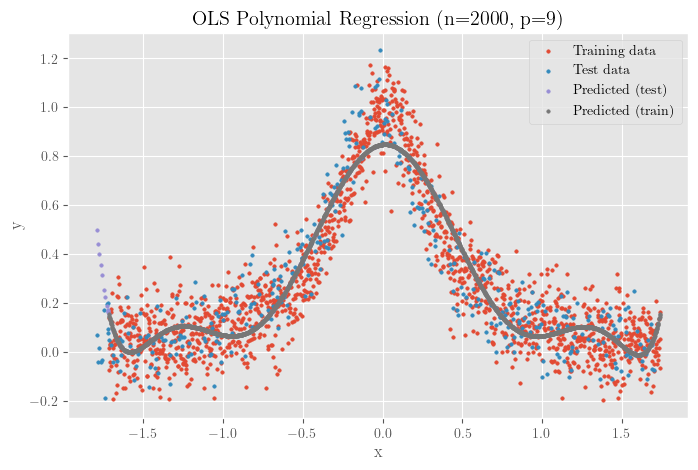

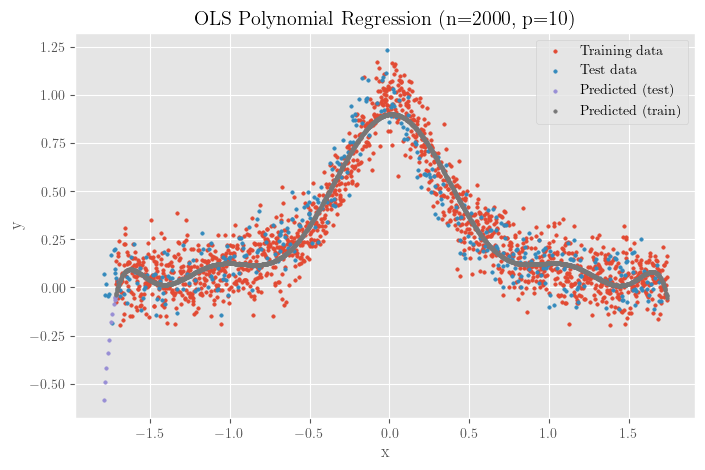

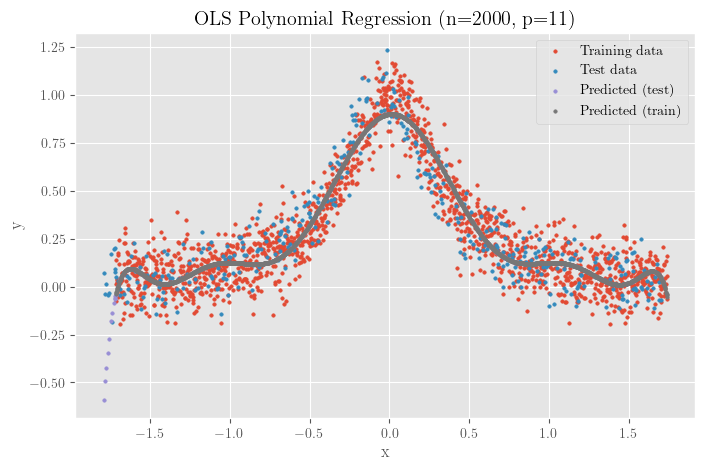

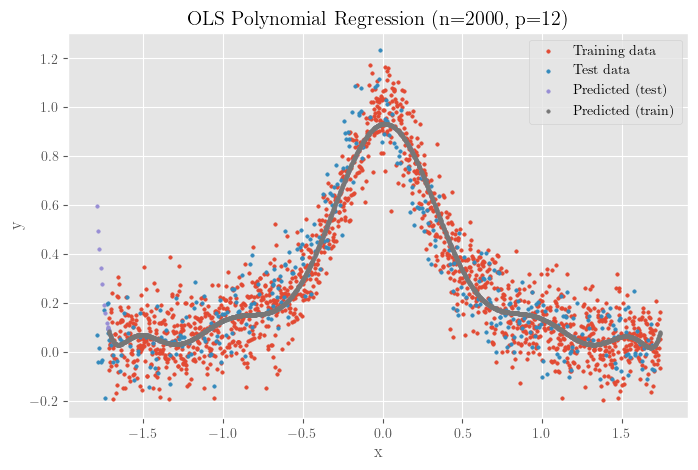

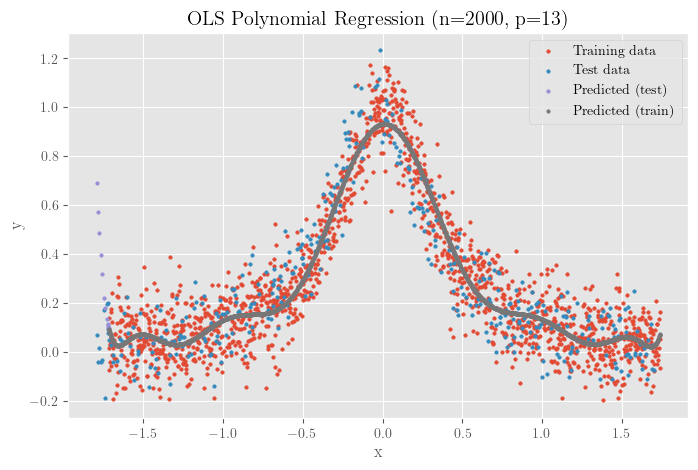

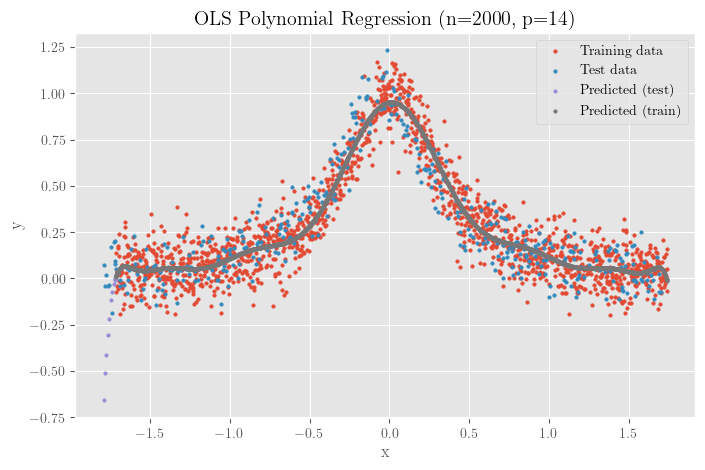

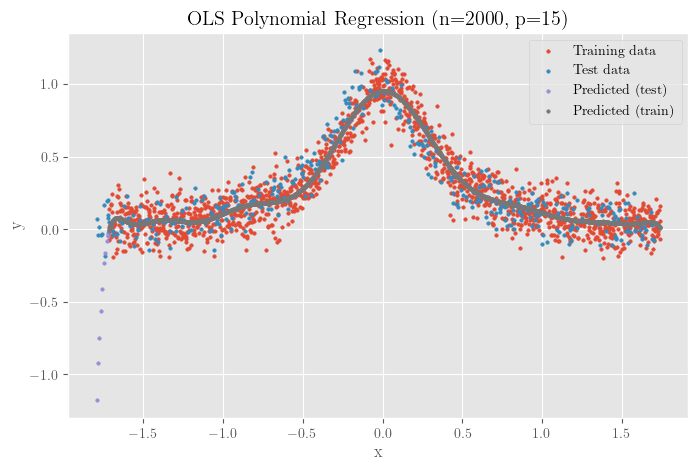

In [70]:
for p in p_vals:
    plot_OLS_results(df_OLS_degs, p, n)

Text(0.5, 0.98, 'OLS (n=2000)')

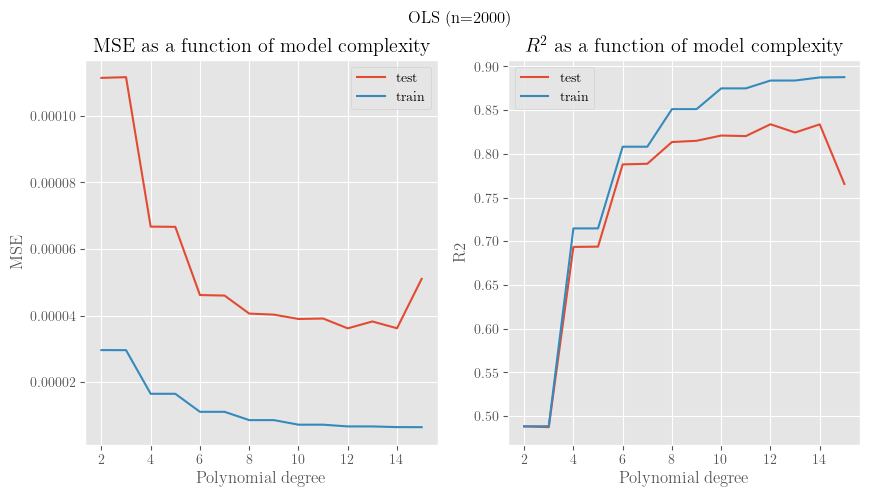

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_test'], label='test')
ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_train'], label='train')

ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_test'], label='test')
ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_train'], label='train')

ax[0].set_ylabel('MSE')
ax[1].set_ylabel('R2')

ax[0].set_title('MSE as a function of model complexity')
ax[1].set_title(r'$R^2$ as a function of model complexity')

for axs in ax:
    axs.legend()
    axs.set_xlabel('Polynomial degree')

fig.suptitle(f'OLS (n={n})')

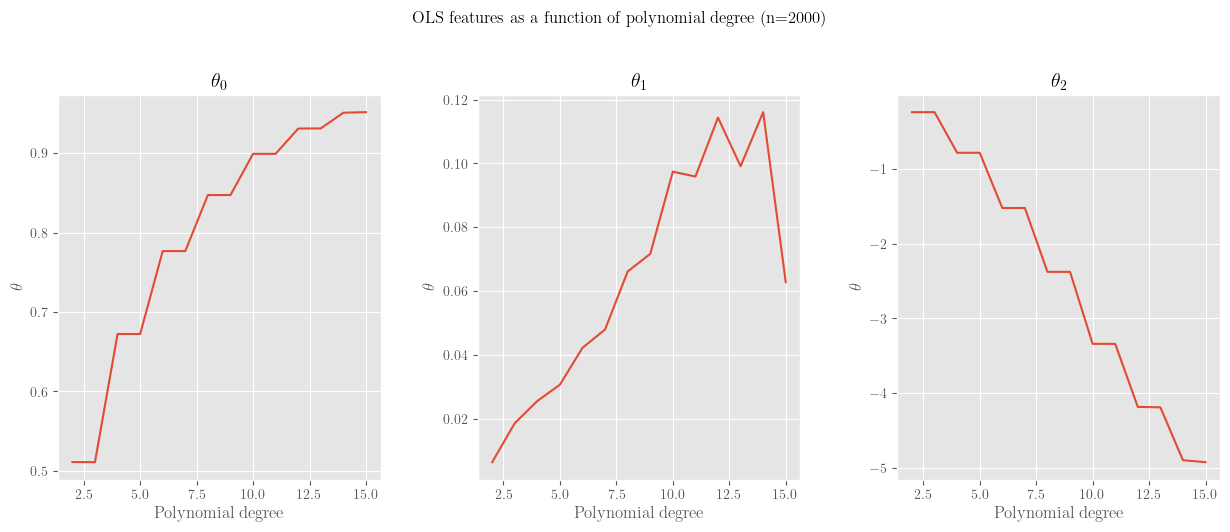

In [72]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(wspace=0.3)

ax[0].plot(df_OLS_degs['p'], df_OLS_degs['theta'].apply(lambda x: x[0]))
ax[1].plot(df_OLS_degs['p'], df_OLS_degs['theta'].apply(lambda x: x[1]))
ax[2].plot(df_OLS_degs['p'], df_OLS_degs['theta'].apply(lambda x: x[2]))

ax[0].set_title(r'$\theta_0$')
ax[1].set_title(r'$\theta_1$')
ax[2].set_title(r'$\theta_2$')

fig.suptitle(f'OLS features as a function of polynomial degree (n={n})', y=1.05)

for axs in ax:
    axs.set_xlabel('Polynomial degree')
    axs.set_ylabel(r'$\theta$')

In [73]:
p = 13  # Polynomial degree
n_vals = np.arange(10, 2000, 1)  # samples

In [74]:
df_OLS_points = OLS_various_n_data(p, n_vals)  # Dataframe with results for one poly degree and for different number of samples

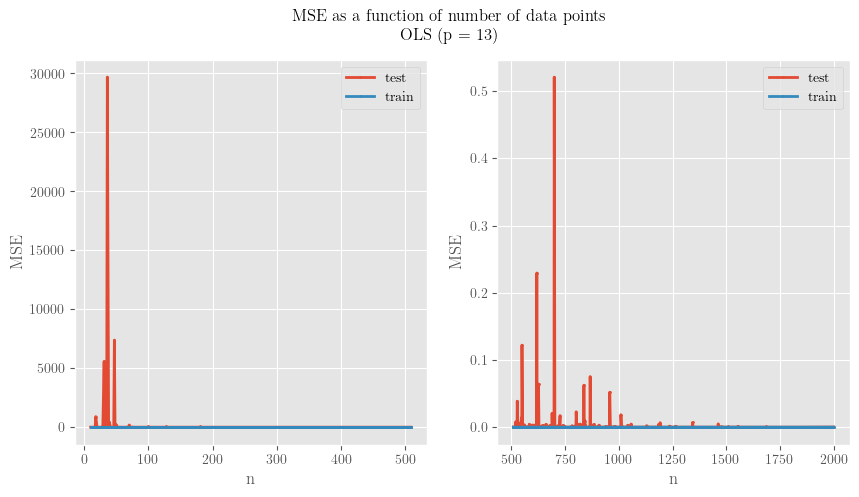

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(df_OLS_points['n'].iloc[:500], df_OLS_points['MSE_test'].iloc[:500], marker='o', markersize='1', linewidth='2', label='test')
ax[0].plot(df_OLS_points['n'].iloc[:500], df_OLS_points['MSE_train'].iloc[:500], marker='o', markersize='1', linewidth='2', label='train')

ax[1].plot(df_OLS_points['n'].iloc[500:], df_OLS_points['MSE_test'].iloc[500:], marker='o', markersize='1', linewidth='2', label='test')
ax[1].plot(df_OLS_points['n'].iloc[500:], df_OLS_points['MSE_train'].iloc[500:], marker='o', markersize='1', linewidth='2', label='train')

fig.suptitle(f'MSE as a function of number of data points \n OLS (p = {p})')

for axs in ax.flatten():
    axs.legend()
    axs.set_ylabel('MSE')
    axs.set_xlabel('n')

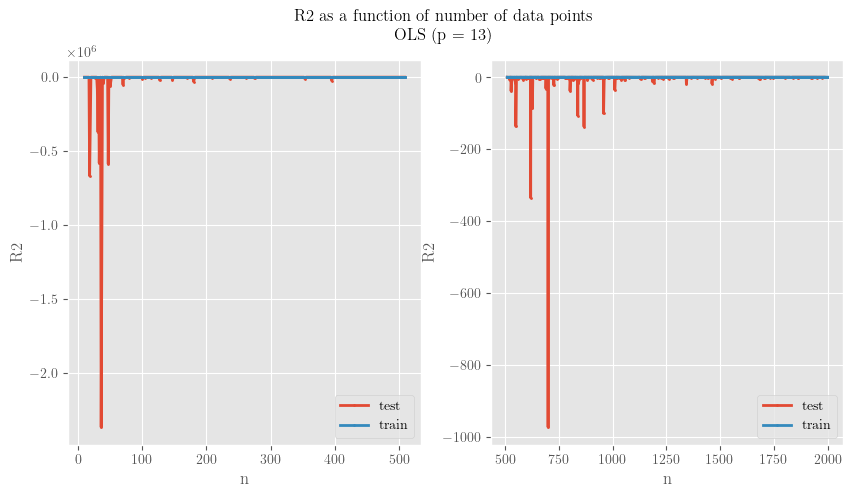

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#ax[1].set_ylim(-0.2, 1)

ax[0].plot(df_OLS_points['n'].iloc[:500], df_OLS_points['R2_test'].iloc[:500], marker='o', markersize='1', linewidth='2', label='test')
ax[0].plot(df_OLS_points['n'].iloc[:500], df_OLS_points['R2_train'].iloc[:500], marker='o', markersize='1', linewidth='2', label='train')

ax[1].plot(df_OLS_points['n'].iloc[500:], df_OLS_points['R2_test'].iloc[500:], marker='o', markersize='1', linewidth='2', label='test')
ax[1].plot(df_OLS_points['n'].iloc[500:], df_OLS_points['R2_train'].iloc[500:], marker='o', markersize='1', linewidth='2', label='train')

fig.suptitle(f'R2 as a function of number of data points \n OLS (p = {p})')

for axs in ax.flatten():
    axs.legend()
    axs.set_ylabel('R2')
    axs.set_xlabel('n')

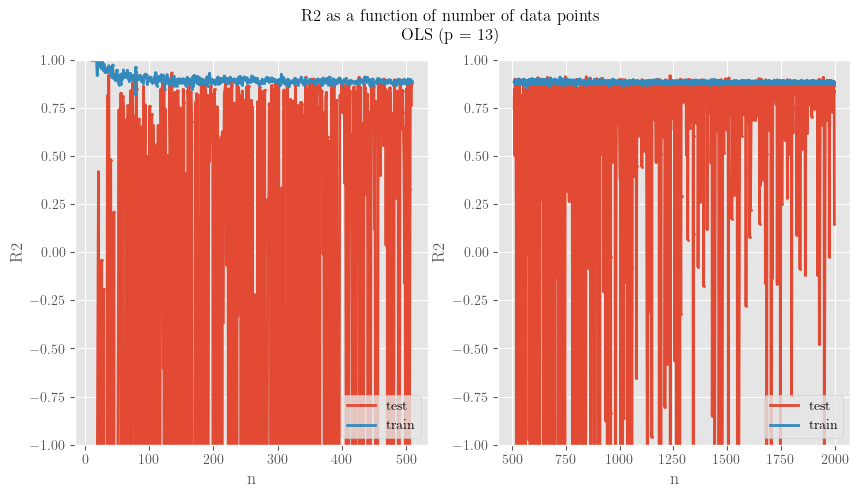

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_ylim(-1, 1)
ax[1].set_ylim(-1, 1)

ax[0].plot(df_OLS_points['n'].iloc[:500], df_OLS_points['R2_test'].iloc[:500], marker='o', markersize='1', linewidth='2', label='test')
ax[0].plot(df_OLS_points['n'].iloc[:500], df_OLS_points['R2_train'].iloc[:500], marker='o', markersize='1', linewidth='2', label='train')

ax[1].plot(df_OLS_points['n'].iloc[500:], df_OLS_points['R2_test'].iloc[500:], marker='o', markersize='1', linewidth='2', label='test')
ax[1].plot(df_OLS_points['n'].iloc[500:], df_OLS_points['R2_train'].iloc[500:], marker='o', markersize='1', linewidth='2', label='train')

fig.suptitle(f'R2 as a function of number of data points \n OLS (p = {p})')

for axs in ax.flatten():
    axs.legend()
    axs.set_ylabel('R2')
    axs.set_xlabel('n')

# b) Ridge regression
* Using Ridge regression to predict the Runge function.
* Method is applied for different polynomial degrees (`p_vals`), and for different values of the penalization parameter $\lambda$.
* Assessing model perfomance with MSE and R^2.

In [78]:
n = 2000  # samples
lamb = 0.01  # regularization term
p_vals = np.arange(2, 16)  # range of polynomial degrees

In [79]:
df_Ridge_degs = Ridge_various_poly_deg(n, lamb, p_vals)  # dataframe w results

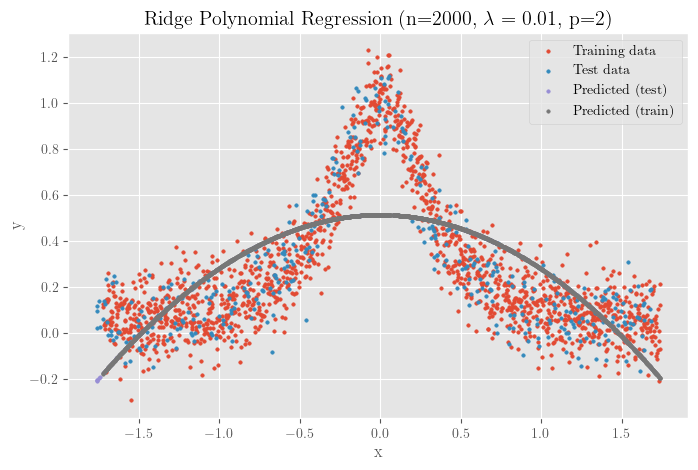

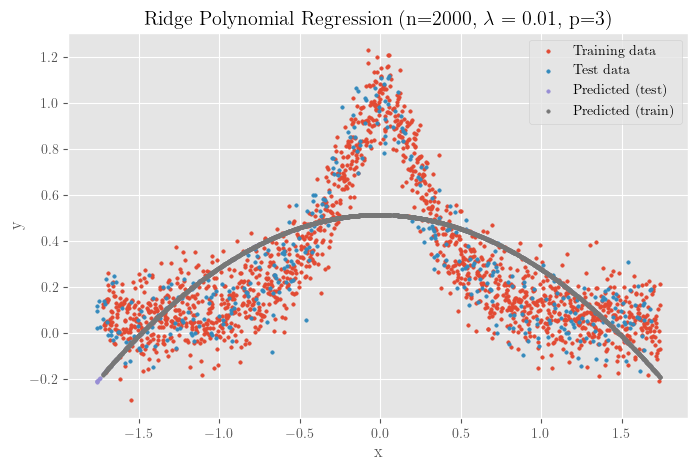

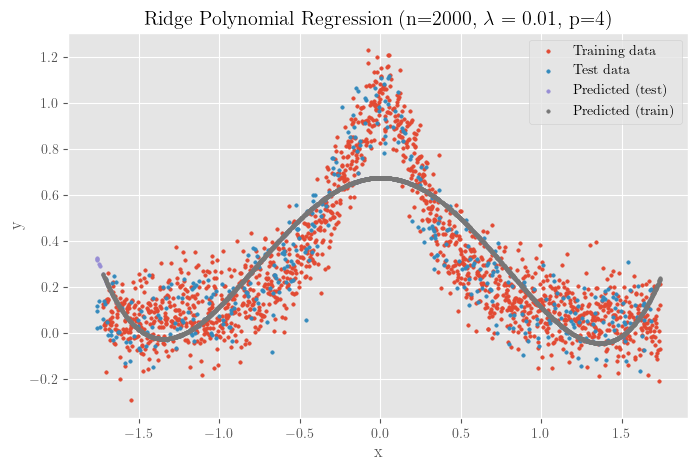

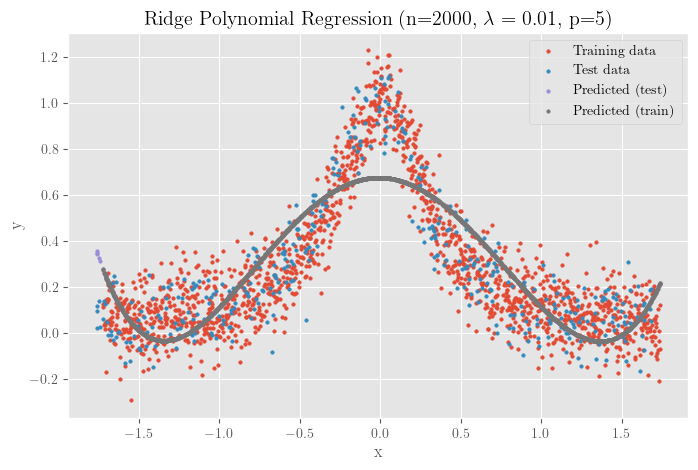

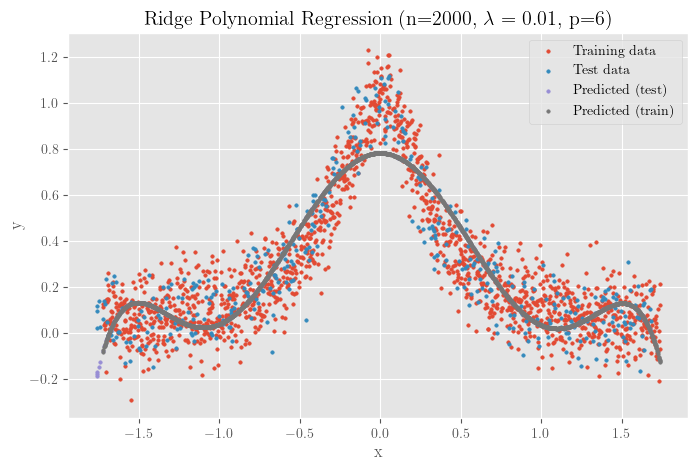

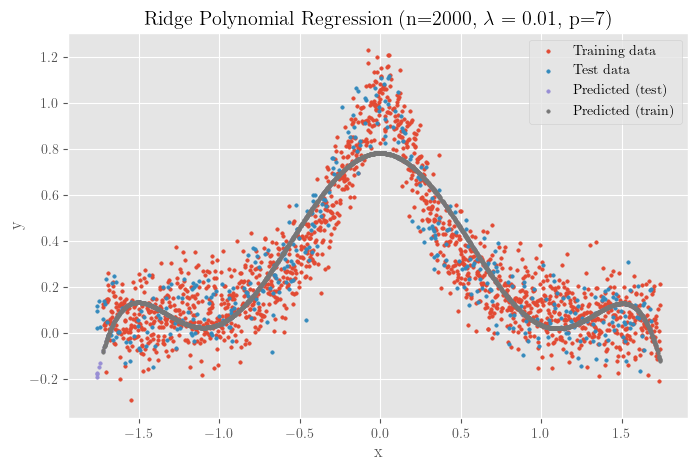

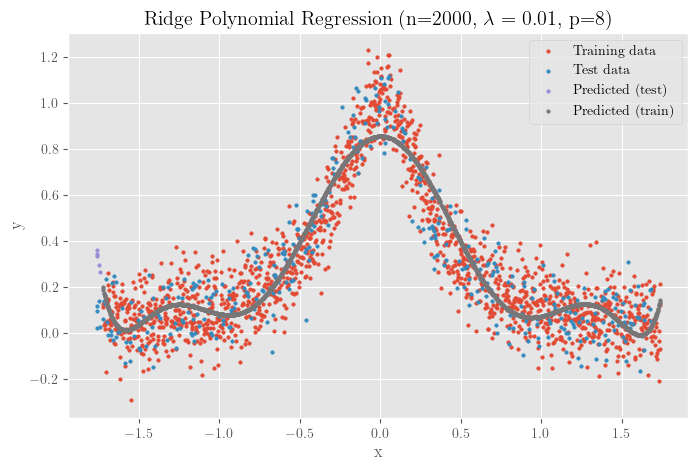

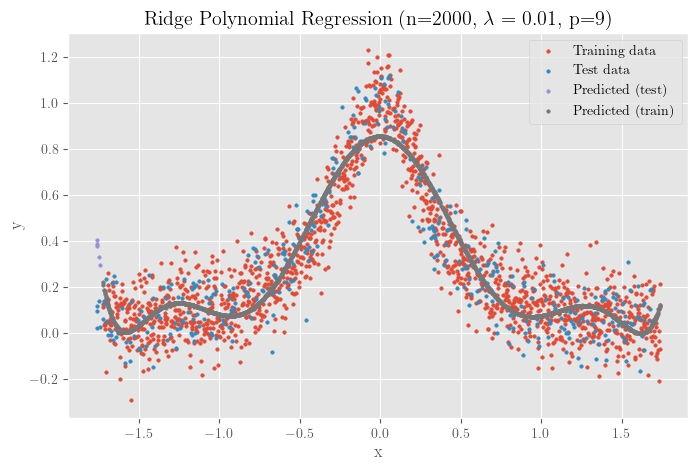

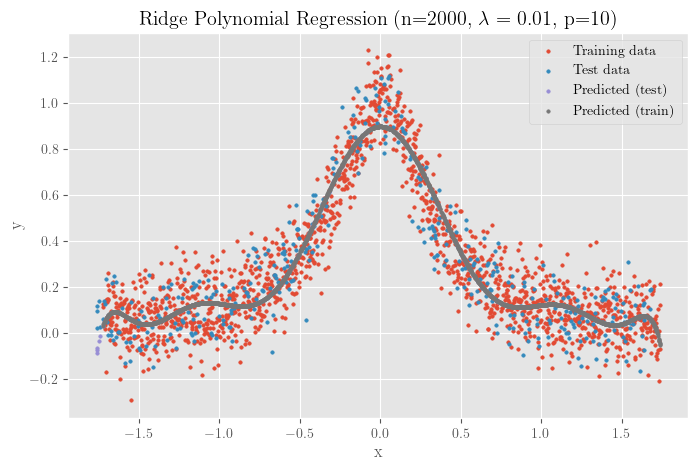

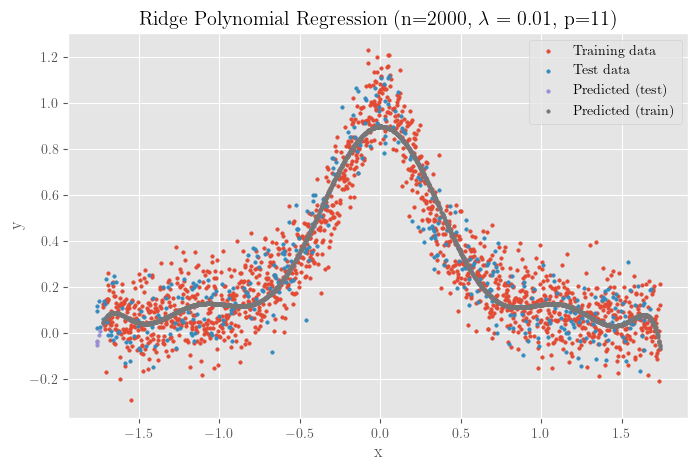

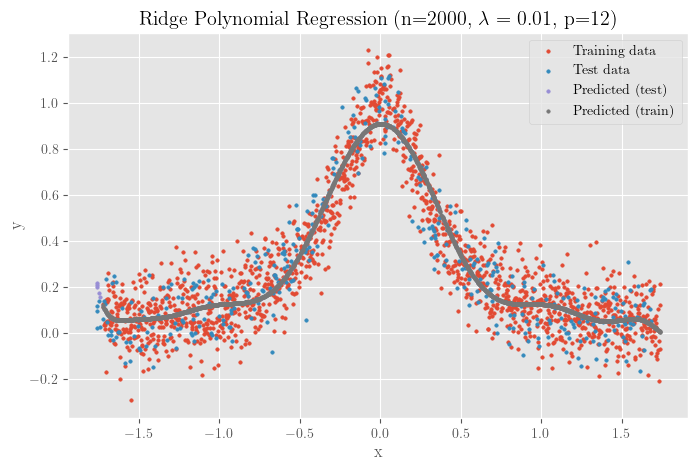

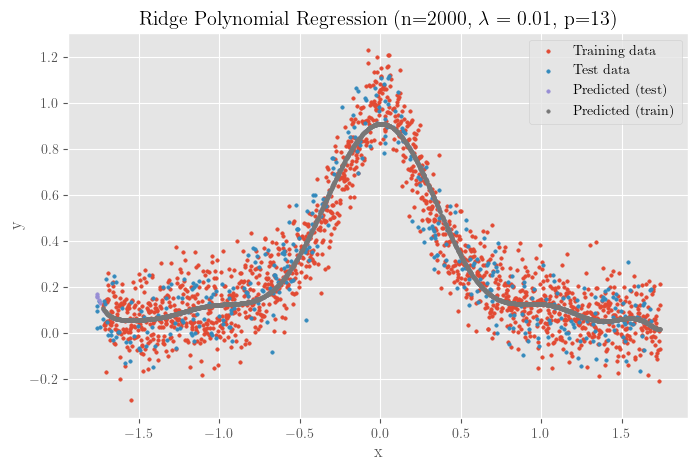

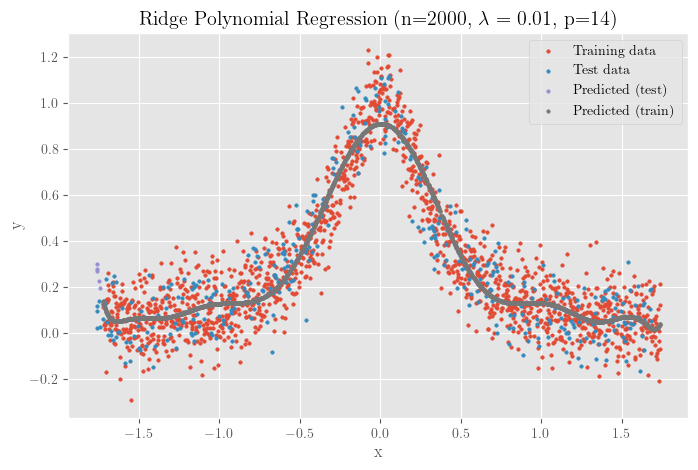

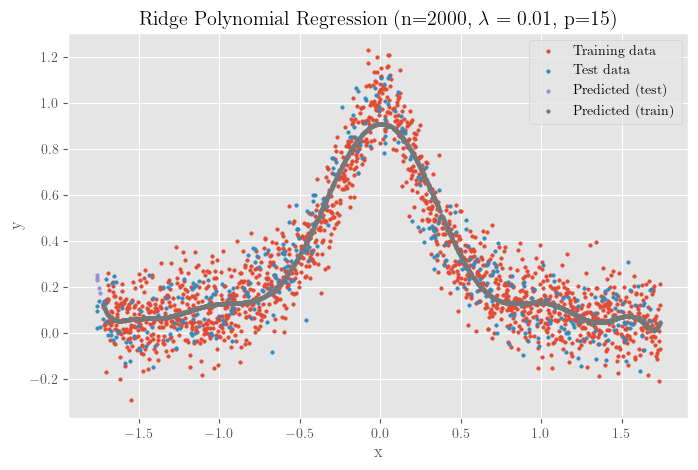

In [80]:
for p in p_vals:    
    plot_Ridge_results(df_Ridge_degs, p, n, lamb)

Text(0.5, 0.98, 'Ridge (n=2000, $\\lambda$=0.01)')

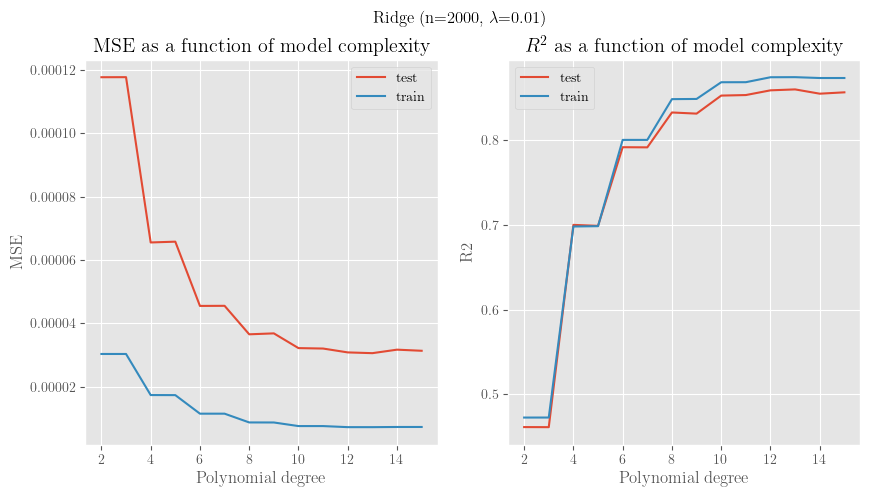

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['MSE_test'], label='test')
ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['MSE_train'], label='train')

ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['R2_test'], label='test')
ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['R2_train'], label='train')

ax[0].set_ylabel('MSE')
ax[1].set_ylabel('R2')

ax[0].set_title('MSE as a function of model complexity')
ax[1].set_title(r'$R^2$ as a function of model complexity')

for axs in ax:
    axs.legend()
    axs.set_xlabel('Polynomial degree')

fig.suptitle(rf'Ridge (n={n}, $\lambda$={lamb})')

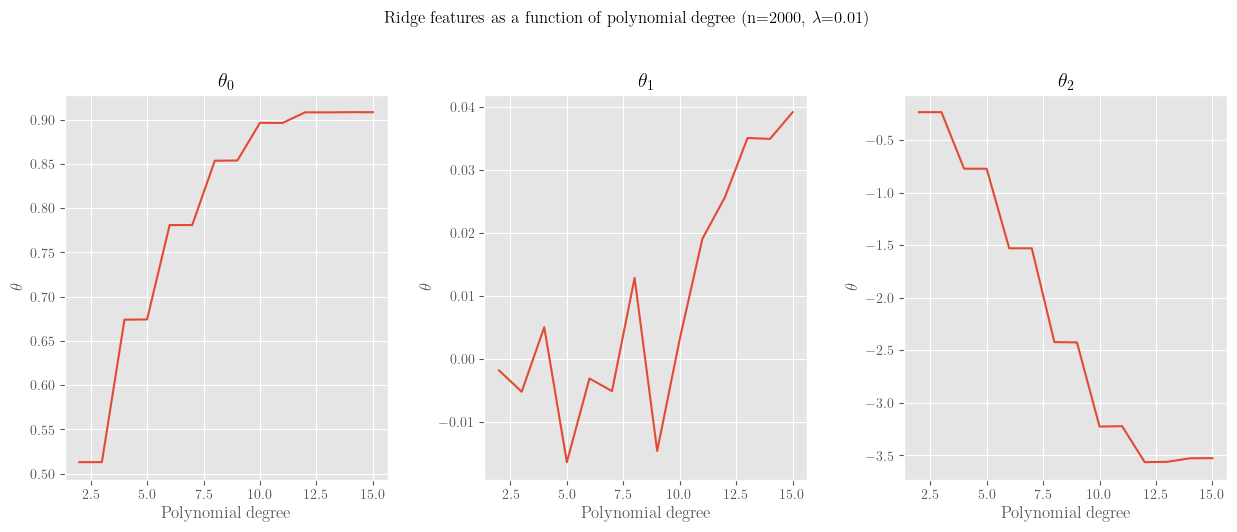

In [82]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(wspace=0.3)

ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['theta'].apply(lambda x: x[0]))
ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['theta'].apply(lambda x: x[1]))
ax[2].plot(df_Ridge_degs['p'], df_Ridge_degs['theta'].apply(lambda x: x[2]))

ax[0].set_title(r'$\theta_0$')
ax[1].set_title(r'$\theta_1$')
ax[2].set_title(r'$\theta_2$')

fig.suptitle(rf'Ridge features as a function of polynomial degree (n={n}, $\lambda$={lamb})', y=1.05)

for axs in ax:
    axs.set_xlabel('Polynomial degree')
    axs.set_ylabel(r'$\theta$')

In [83]:
n = 2000
p = 13
lambs = np.logspace(-10, 1, 15)

In [84]:
df_Ridge_lambs = Ridge_various_lambs(n, p, lambs)

Text(0.5, 1.05, 'Ridge (n=2000, p=13)')

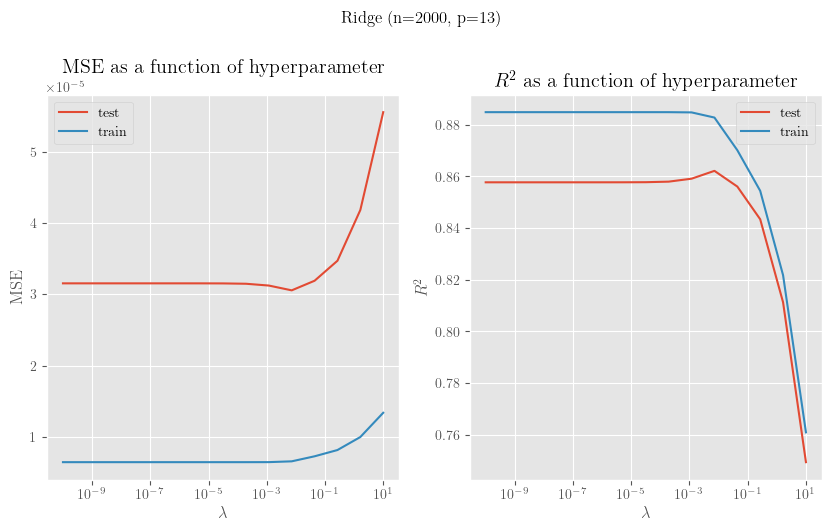

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[0].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['MSE_test'], label='test')
ax[0].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['MSE_train'], label='train')

ax[1].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['R2_test'], label='test')
ax[1].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['R2_train'], label='train')

ax[0].set_ylabel('MSE')
ax[1].set_ylabel(r'$R^2$')

ax[0].set_title('MSE as a function of hyperparameter')
ax[1].set_title(r'$R^2$ as a function of hyperparameter')

for axs in ax:
    axs.legend()
    axs.set_xlabel(r'$\lambda$')

fig.suptitle(f'Ridge (n={n}, p={p})', y=1.05)

# Comparing OLS and Ridge

Text(0.5, 0.98, 'OLS and Ridge \\\\n = 2000, $\\lambda$=0.01')

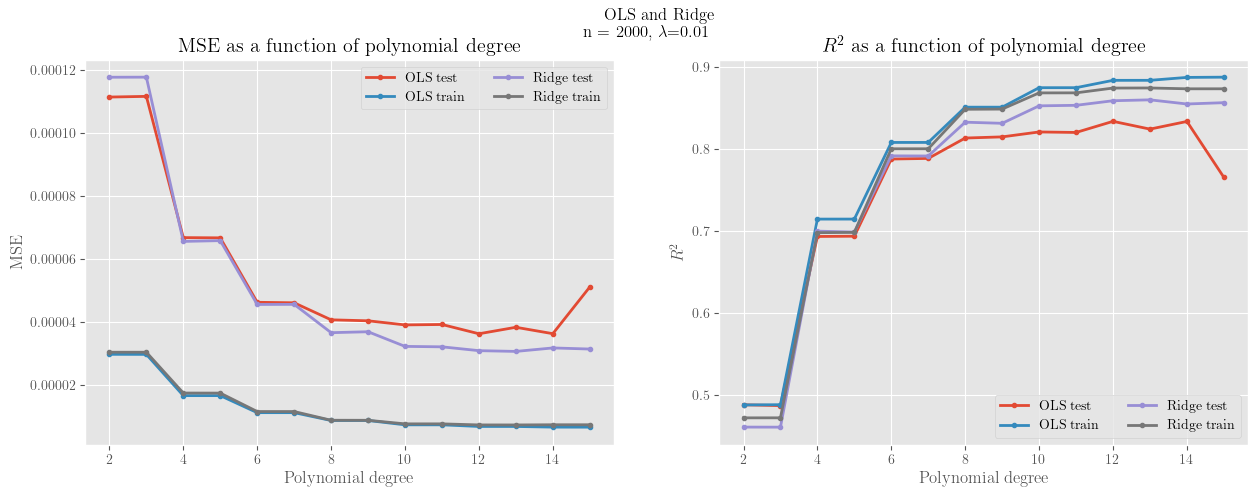

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_test'], marker='o', markersize='3', linewidth='2', label='OLS test')
ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_train'], marker='o', markersize='3', linewidth='2', label='OLS train')

ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['MSE_test'], marker='o', markersize='3', linewidth='2', label='Ridge test')
ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['MSE_train'], marker='o', markersize='3', linewidth='2', label='Ridge train')


ax[0].set_title('MSE as a function of polynomial degree')
ax[0].legend(loc='upper right', ncol=2)
ax[0].set_xlabel('Polynomial degree')
ax[0].set_ylabel('MSE')

ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_test'], marker='o', markersize='3', linewidth='2', label=f'OLS test')
ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_train'], marker='o', markersize='3', linewidth='2', label=f'OLS train')

ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['R2_test'], marker='o', markersize='3', linewidth='2', label=f'Ridge test')
ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['R2_train'], marker='o', markersize='3', linewidth='2', label=f'Ridge train')

ax[1].set_title(r'$R^2$ as a function of polynomial degree')
ax[1].legend(loc='lower right', ncol=2)
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle(rf'OLS and Ridge \\n = {n}, $\lambda$={lamb}')

Text(0.5, 0.98, 'Features as a function of polynomial degree (n=2000)')

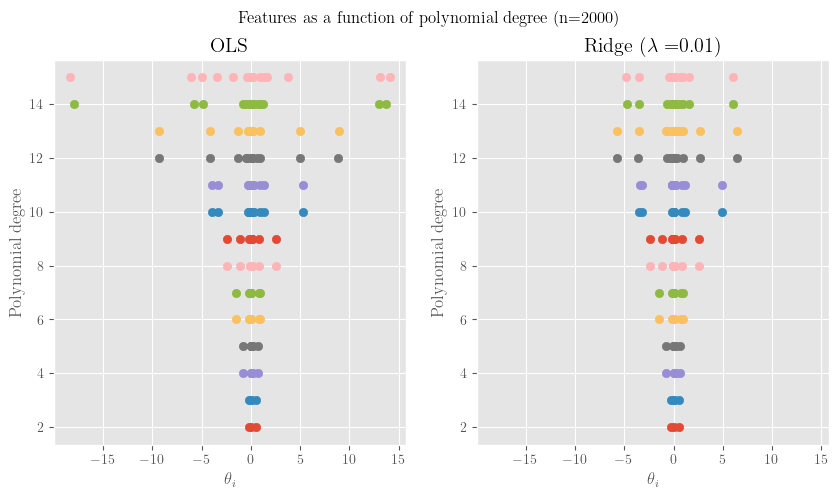

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(10,5), sharex=True)

for i,j in zip(df_OLS_degs["p"], df_OLS_degs["theta"]):
    d = np.full((i+1),fill_value=i)
    ax[0].scatter(j,d)

ax[0].set_title('OLS')

for i,j in zip(df_Ridge_degs["p"], df_Ridge_degs["theta"]):
    d = np.full((i+1),fill_value=i)
    ax[1].scatter(j,d)

ax[1].set_title(rf'Ridge ($\lambda =${lamb})')

for axs in ax:
    axs.set_xlabel(r'$\theta_i$')
    axs.set_ylabel('Polynomial degree')

fig.suptitle(f'Features as a function of polynomial degree (n={n})')

Text(0.5, 0, '$\\theta_i$')

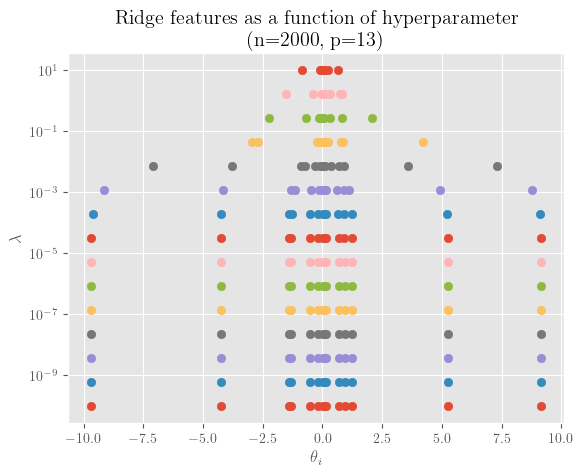

In [88]:
fig, ax = plt.subplots()

for t, l in zip(df_Ridge_lambs['theta'], df_Ridge_lambs['lambda']):
    ls = np.ones(14)*l
    ax.scatter(t, ls)

ax.set_yscale('log')
ax.set_title(f'Ridge features as a function of hyperparameter \n (n={n}, p={p})')

ax.set_ylabel(r'$\lambda$')
ax.set_xlabel(r'$\theta_i$')